# Ski Bearing Playground

- https://geoffboeing.com/2018/07/comparing-city-street-orientations/
- https://doi.org/10.1007/s41109-019-0189-1
- https://github.com/gboeing/osmnx
- https://github.com/russellporter/openskimap.org/issues/82
- groomed v ungroomed
- https://github.com/tilezen/joerd
- trail orientation v aspect
- weight by elevation descent
- max slope v difficulty by region
- https://osmnx.readthedocs.io/en/stable/internals-reference.html-osmnx-bearing-module
- https://stackoverflow.com/questions/54873868/python-calculate-bearing-between-two-lat-long
- https://github.com/gboeing/osmnx/blob/cabdbb246dc14095f5d8e8b8ead38f9649dae2c7/osmnx/bearing.py#L18


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ski_bearings.utils

In [ ]:
ski_area_df = ski_bearings.utils.load_downhill_ski_areas()
len(ski_area_df)

6448

In [ ]:
ski_area_df.status.value_counts(dropna=False)

status
operating    5352
abandoned     855
None          202
proposed       39
Name: count, dtype: int64

In [ ]:
ski_area_df.runConvention.value_counts(dropna=False)

runConvention
europe           3978
north_america    1771
japan             699
Name: count, dtype: int64

In [57]:
runs = ski_bearings.utils.load_runs()
ski_area_to_runs = ski_bearings.utils.get_ski_area_to_runs(runs)
len(runs), len(ski_area_to_runs)

(193513, 4643)

In [40]:
ski_area_metadatas = {x["id"]: x for x in ski_area_df.to_dict(orient="records")}

/home/dhimmel/.cache/pypoetry/virtualenvs/openskimap-aspects-cIphqNWs-py3.12/lib/python3.12/site-packages/osmnx/bearing.py:276: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `utils_graph.get_undirected`.
  bearings = _extract_edge_bearings(G, min_length, weight)
/home/dhimmel/.cache/pypoetry/virtualenvs/openskimap-aspects-cIphqNWs-py3.12/lib/python3.12/site-packages/osmnx/bearing.py:276: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `utils_graph.get_undirected`.
  bearings = _extract_edge_bearings(G, min_length, weight)
/home/dhimmel/.cache/pypoetry/virtualenvs/openskimap-aspects-cIphqNWs-py3.12/lib/python3.12/site-packages/osmnx/bearing.py:276: UserWarning: `G` is a MultiDiGraph, so edge be

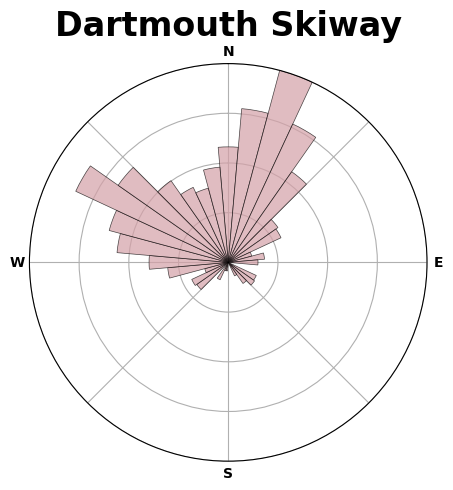

In [44]:
ski_area_id = "74e0060a96e0399ace1b1e5ef5af1e5197a19752"  # Dartmouth Skiway
graph = ski_bearings.utils.analyze_ski_area(
    runs=ski_area_to_runs[ski_area_id],
    ski_area_metadata=ski_area_metadatas[ski_area_id],
)

In [58]:
graph.graph

{'crs': 'EPSG:4326',
 'id': '74e0060a96e0399ace1b1e5ef5af1e5197a19752',
 'name': 'Dartmouth Skiway',
 'generated': False,
 'runConvention': 'north_america',
 'status': 'operating',
 'location': nan,
 'location__iso3166_1Alpha2': 'US',
 'location__iso3166_2': 'US-NH',
 'location__localized__en__country': 'United States',
 'location__localized__en__region': 'New Hampshire',
 'location__localized__en__locality': 'Lyme',
 'websites': ['http://skiway.dartmouth.edu/'],
 'sources': [{'type': 'openstreetmap', 'id': 'relation/15475391'},
  {'type': 'skimap.org', 'id': 345}],
 'statistics__minElevation': 281.64000000000004,
 'statistics__maxElevation': 579.19,
 'statistics__runs__minElevation': 280.24,
 'statistics__runs__maxElevation': 580.19,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__count': nan,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__lengthInKm': nan,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__combinedElevationChange': nan,
 

In [32]:
run_counts = {k: len(v) for k, v in ski_area_to_runs.items()}
# run_counts

In [28]:
runs[0]

{'type': 'Feature',
 'properties': {'type': 'run',
  'uses': ['downhill'],
  'name': None,
  'ref': None,
  'description': None,
  'difficulty': 'easy',
  'convention': 'europe',
  'oneway': True,
  'gladed': None,
  'patrolled': None,
  'lit': None,
  'color': 'hsl(208, 100%, 33%)',
  'colorName': 'blue',
  'grooming': None,
  'skiAreas': [{'properties': {'activities': ['downhill', 'nordic'],
     'generated': False,
     'id': '68b126bc3175516c9263aed7635d14e37ff360dc',
     'location': {'iso3166_1Alpha2': 'FR',
      'iso3166_2': 'FR-ARA',
      'localized': {'en': {'country': 'France',
        'region': 'Auvergne-Rhône-Alpes',
        'locality': 'Les Allues'}}},
     'name': 'Les Trois Vallées',
     'runConvention': 'europe',
     'sources': [{'type': 'openstreetmap', 'id': 'relation/3545276'},
      {'type': 'skimap.org', 'id': 1079}],
     'status': 'operating',
     'type': 'skiArea',
     'websites': ['http://www.les3vallees.com'],
     'statistics': {'runs': {'byActivity': {

In [4]:
ski_area_subset = [
    "Killington Resort",
    "Dartmouth Skiway",
    "Whaleback Mountain",
    "Storrs Hill Ski Area",
    "Saskadena Six",
    "Stowe Mountain Resort",
    "Sugarbush Resort",
    "Smugglers' Notch Resort",
    "Jay Peak Resort",
    "Bolton Valley Resort",
    "Stratton Mountain Resort",
    "Okemo Mountain",
    "Bromley Mountain Ski Resort",
    "Magic Mountain Ski Area",
    "Waterville Valley",
    "Palisades Tahoe Olympic Valley",
]
groupings = {}
for ski_area in ski_area_subset:
    print(ski_area)
    groupings[ski_area] = ski_bearings.utils.create_networkx(ski_area_to_runs[ski_area])
len(groupings)

Killington Resort
Dartmouth Skiway
Whaleback Mountain
Storrs Hill Ski Area
Saskadena Six
Stowe Mountain Resort
Sugarbush Resort
Smugglers' Notch Resort
Jay Peak Resort
Bolton Valley Resort
Stratton Mountain Resort
Okemo Mountain
Bromley Mountain Ski Resort
Magic Mountain Ski Area
Waterville Valley
Palisades Tahoe Olympic Valley


16

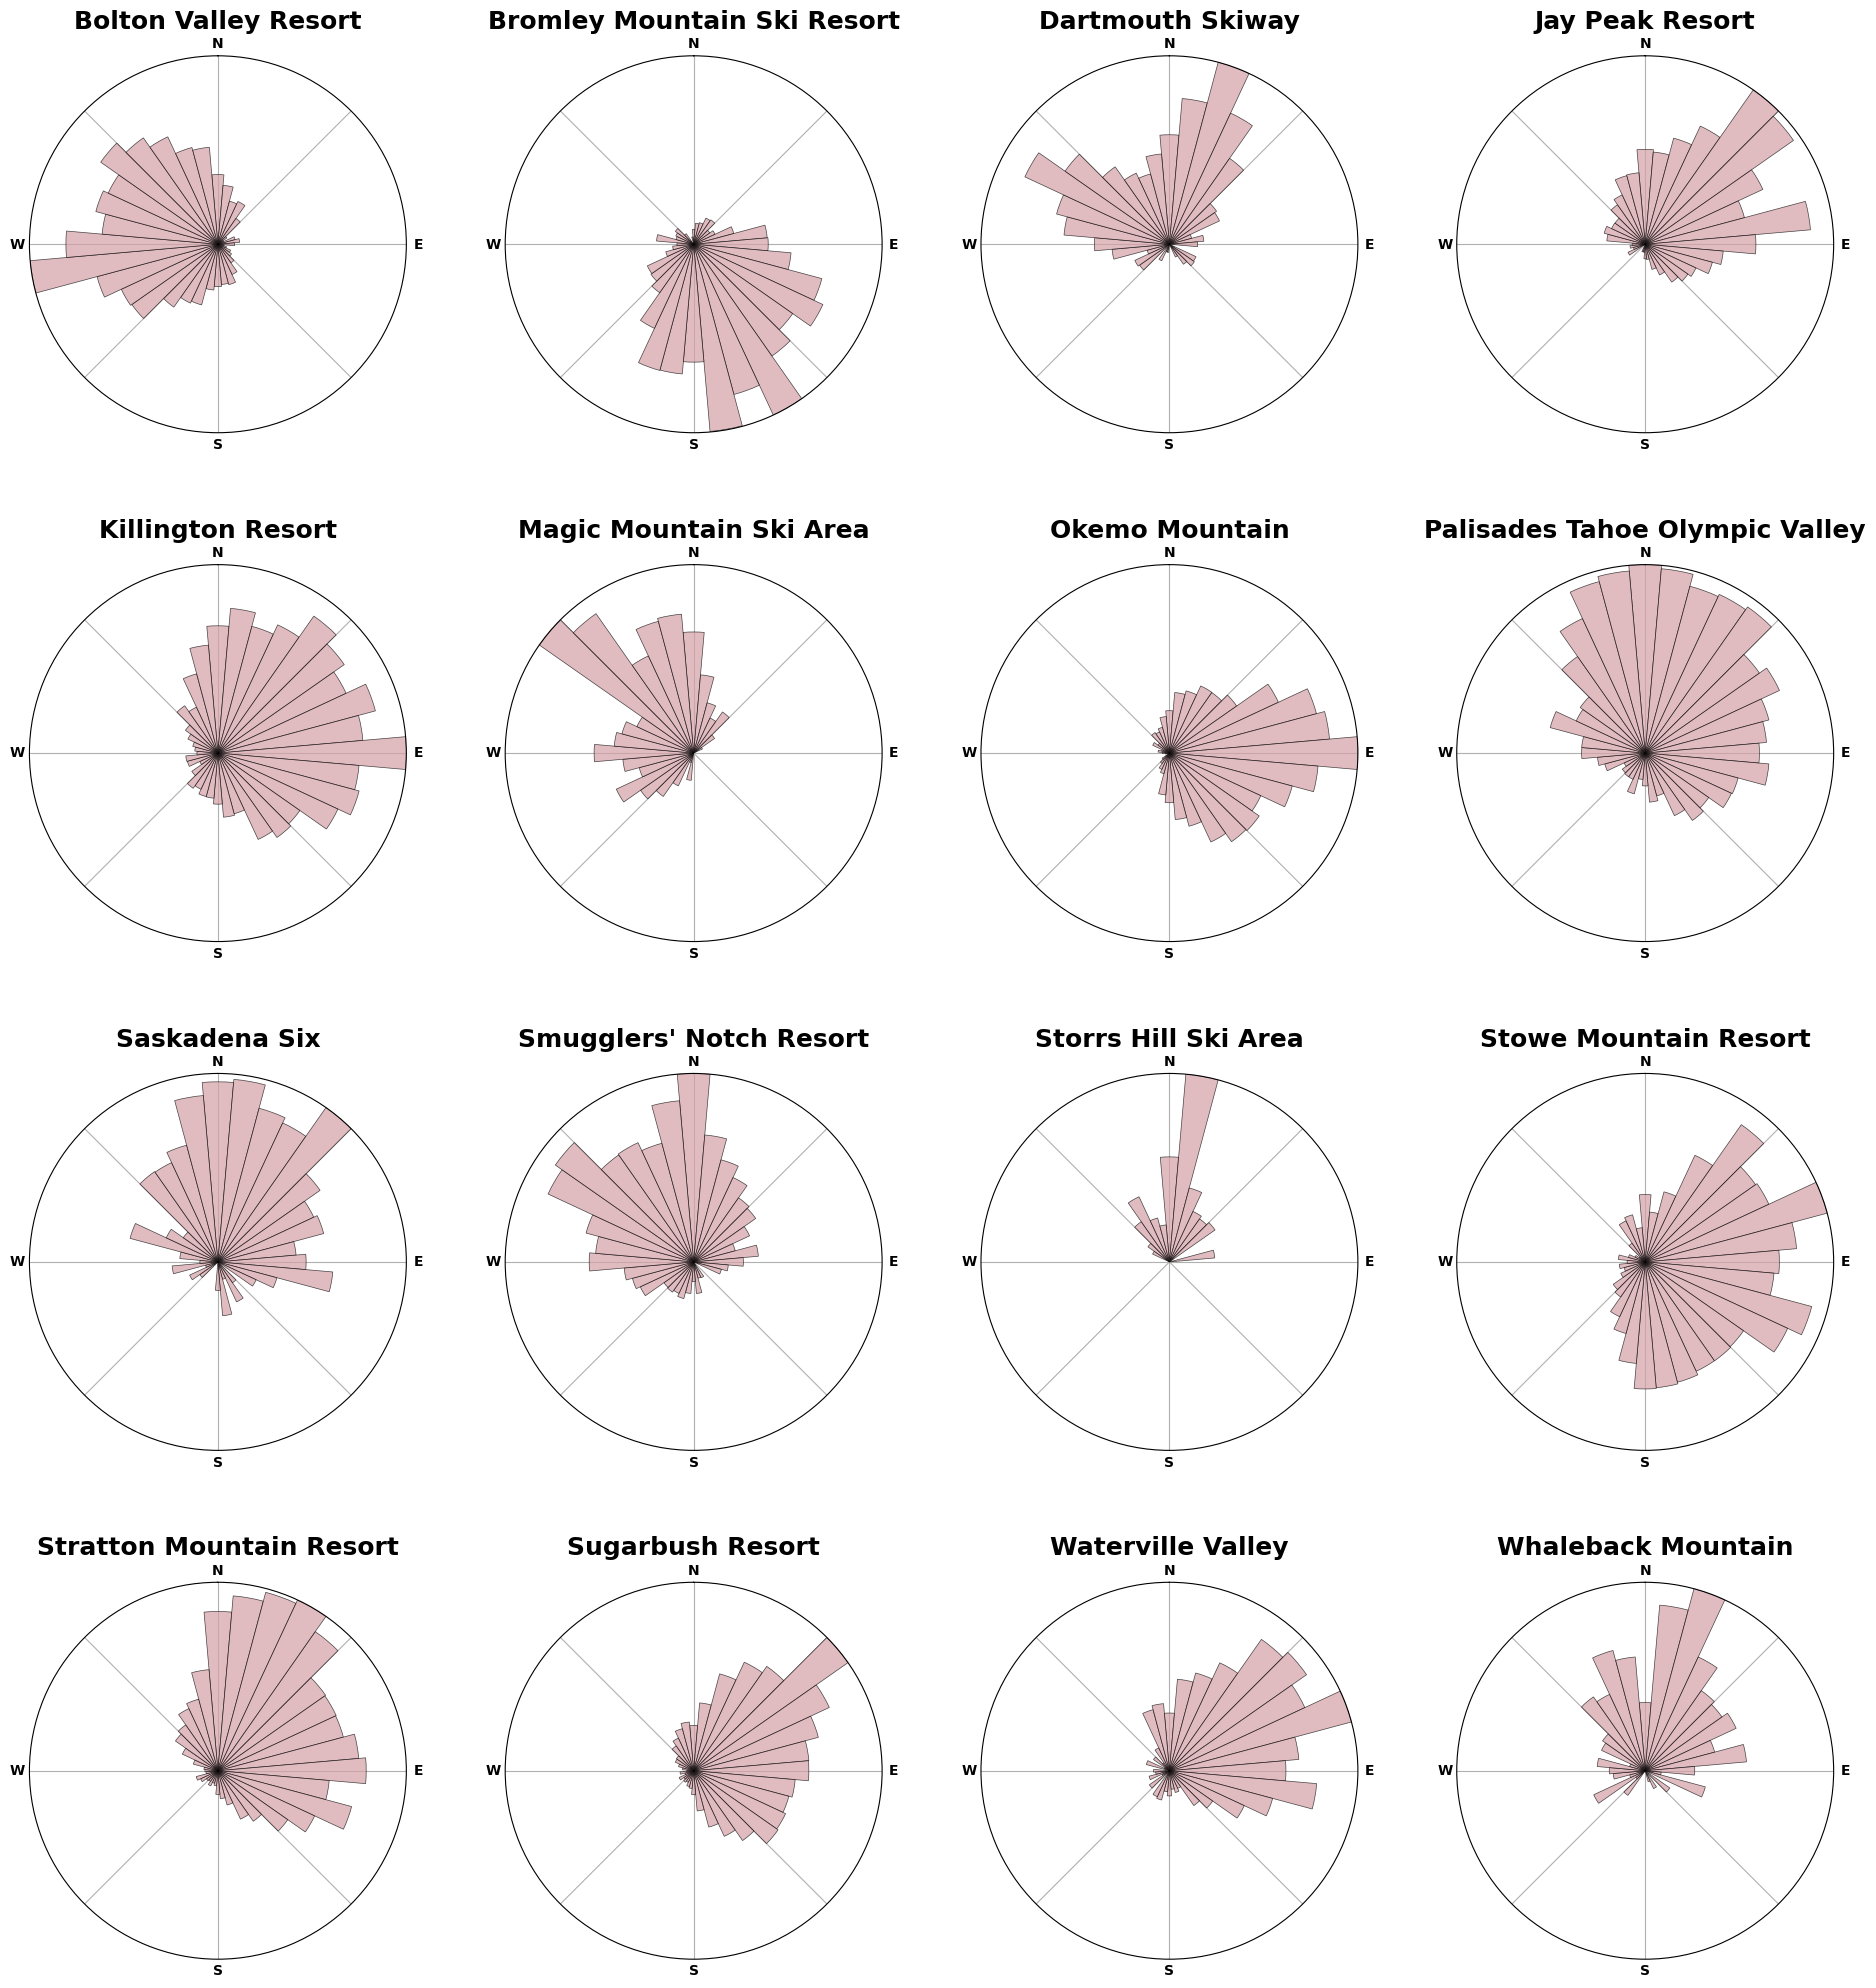

In [6]:
ski_bearings.utils.subplot_orientations(groupings)

Series([], Name: location, dtype: float64)

In [23]:
ski_area_df.to_dict(orient="records")[0]

{'id': 'f9a7b501ed966ed140fc2b5290e472c0a825d9be',
 'name': "Cauterets Pont d'Espagne",
 'generated': False,
 'runConvention': 'europe',
 'status': 'operating',
 'location': nan,
 'location__iso3166_1Alpha2': 'FR',
 'location__iso3166_2': None,
 'location__localized__en__country': 'France',
 'location__localized__en__region': None,
 'location__localized__en__locality': None,
 'websites': [],
 'sources': [{'type': 'openstreetmap', 'id': 'relation/2873910'}],
 'statistics__minElevation': 1515.0,
 'statistics__maxElevation': 1755.25,
 'statistics__runs__minElevation': 1515.0,
 'statistics__runs__maxElevation': 1757.25,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__count': 2.0,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__lengthInKm': 0.36506435611032134,
 'statistics__runs__byActivity__downhill__byDifficulty__novice__combinedElevationChange': 52.38999999999987,
 'statistics__runs__byActivity__downhill__byDifficulty__easy__count': 1.0,
 'statistics__run

In [17]:
list(ski_area_df.columns)

['generated',
 'id',
 'name',
 'runConvention',
 'sources',
 'status',
 'type',
 'websites',
 'location__iso3166_1Alpha2',
 'location__iso3166_2',
 'location__localized__en__country',
 'location__localized__en__region',
 'location__localized__en__locality',
 'statistics__runs__byActivity__nordic__byDifficulty__novice__count',
 'statistics__runs__byActivity__nordic__byDifficulty__novice__lengthInKm',
 'statistics__runs__byActivity__nordic__byDifficulty__novice__minElevation',
 'statistics__runs__byActivity__nordic__byDifficulty__novice__maxElevation',
 'statistics__runs__byActivity__nordic__byDifficulty__novice__combinedElevationChange',
 'statistics__runs__byActivity__nordic__byDifficulty__easy__count',
 'statistics__runs__byActivity__nordic__byDifficulty__easy__lengthInKm',
 'statistics__runs__byActivity__nordic__byDifficulty__easy__minElevation',
 'statistics__runs__byActivity__nordic__byDifficulty__easy__maxElevation',
 'statistics__runs__byActivity__nordic__byDifficulty__easy__comb